## Cle Elum Ridge (CER) Treatment Manuscript Scripts 
## `figure2_3_domain.ipynb` copied from `4_domain_plots` 
### Creating Figures 2 and 3 

created by Cassie Lumbrazo\
last updated: July 2025\
run location: UAS linux\
python environment: **cer_treatment**

In [4]:
# import packages 
%matplotlib inline

# plotting packages 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns 

sns.set_theme()
# plt.rcParams['figure.figsize'] = [12,6] #overriding size

# data packages 
import pandas as pd
import numpy as np
import xarray as xr
from datetime import datetime

# import csv 
# import copy 
# import os.path 

# import geopandas as gpd
# import rasterio
# from rasterio.warp import calculate_default_transform, reproject, Resampling
# import rioxarray
# import rasterio

import scipy

In [5]:
from matplotlib.patches import Patch
from matplotlib.colors import ListedColormap
from matplotlib import ticker

In [6]:
from matplotlib_scalebar.scalebar import ScaleBar

In [7]:
figure_path = '/home/cassie/data/cer_treatment_manuscript/figures/' # Cassie remote path on new linux machine

# ds = xr.open_dataset('C:\\Users\\Lumbr\\OneDrive - UW/Documents\\Washington\\EasternCascades\\Python\\CER_raster_analysis\\rapid_model_cleandata_create_netcdf_negtozero_v3_b.nc') 
ds = xr.open_dataset('/home/cassie/data/cer_treatment_manuscript/cer_treatment_region_dataset_all_variables.nc') # Cassie remote path on new linux machine
ds

<xarray.Dataset> Size: 5GB
Dimensions:                           (x: 2564, y: 1388, band: 1)
Coordinates:
  * x                                 (x) float64 21kB 4.65e+05 ... 4.676e+05
  * y                                 (y) float64 11kB 2.111e+05 ... 2.097e+05
  * band                              (band) int32 4B 1
    spatial_ref                       int32 4B ...
Data variables: (12/337)
    chmws_rapid                       (band, y, x) float32 14MB ...
    dce_rapid                         (band, y, x) float32 14MB ...
    giulia_dce_rapid                  (band, y, x) float32 14MB ...
    giulia_dce_ncalm                  (band, y, x) float32 14MB ...
    slope                             (band, y, x) float32 14MB ...
    aspect                            (band, y, x) float32 14MB ...
    ...                                ...
    hs_rapid_baf_new_100s_n           (band, y, x) float32 14MB ...
    hs_rapid_baf_new_30s_s            (band, y, x) float32 14MB ...
    hs_rapid_baf_new_60s_s            (band, y, x) float32 14MB ...
    hs_rapid_baf_new_80s_s            (band, y, x) float32 14MB ...
    hs_rapid_baf_new_90s_s            (band, y, x) float32 14MB ...
    hs_rapid_baf_new_100s_s           (band, y, x) float32 14MB ...

In [8]:
ds

<xarray.Dataset> Size: 5GB
Dimensions:                           (x: 2564, y: 1388, band: 1)
Coordinates:
  * x                                 (x) float64 21kB 4.65e+05 ... 4.676e+05
  * y                                 (y) float64 11kB 2.111e+05 ... 2.097e+05
  * band                              (band) int32 4B 1
    spatial_ref                       int32 4B ...
Data variables: (12/337)
    chmws_rapid                       (band, y, x) float32 14MB ...
    dce_rapid                         (band, y, x) float32 14MB ...
    giulia_dce_rapid                  (band, y, x) float32 14MB ...
    giulia_dce_ncalm                  (band, y, x) float32 14MB ...
    slope                             (band, y, x) float32 14MB ...
    aspect                            (band, y, x) float32 14MB ...
    ...                                ...
    hs_rapid_baf_new_100s_n           (band, y, x) float32 14MB ...
    hs_rapid_baf_new_30s_s            (band, y, x) float32 14MB ...
    hs_rapid_baf_new_60s_s            (band, y, x) float32 14MB ...
    hs_rapid_baf_new_80s_s            (band, y, x) float32 14MB ...
    hs_rapid_baf_new_90s_s            (band, y, x) float32 14MB ...
    hs_rapid_baf_new_100s_s           (band, y, x) float32 14MB ...

In [9]:
colorpre='darkslategray'
colorpos='royalblue'
# colorpos='mediumvioletred'

colorsouth = 'darkorange'
colornorth = 'darkblue'

# Figure 

/tmp/ipykernel_4000938/361229498.py:78: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(figure_path + figure_name, dpi=500)


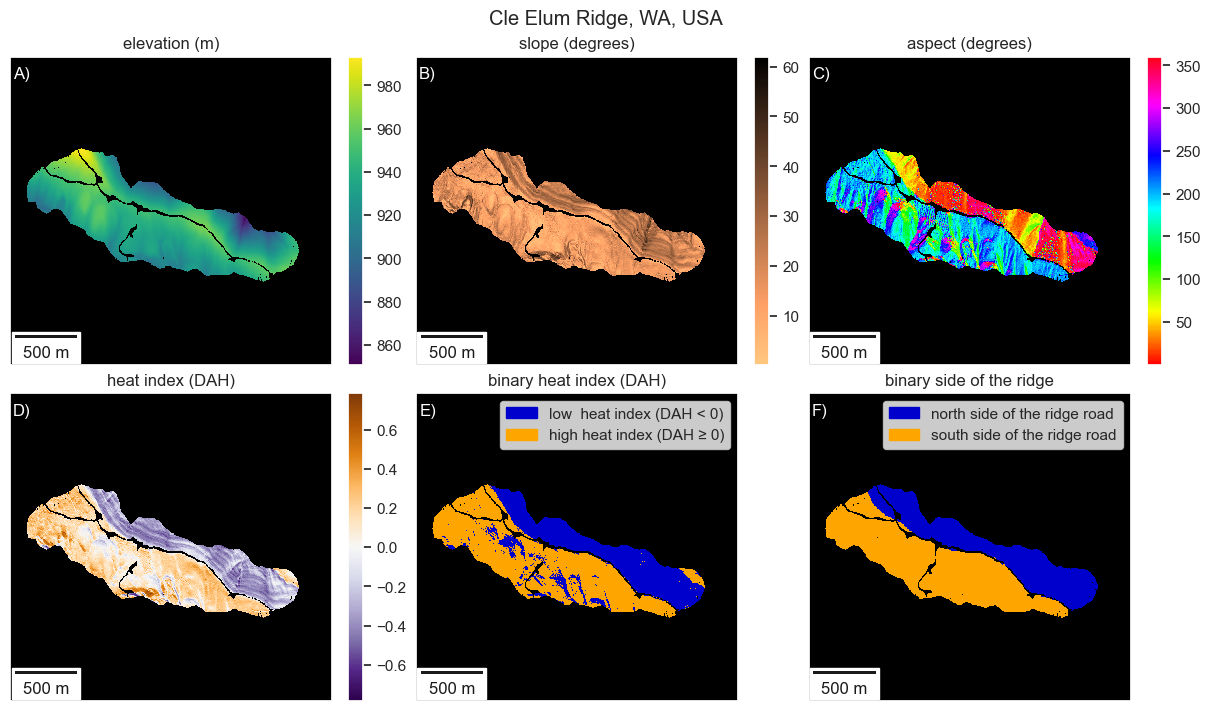

In [12]:
fig, axes = plt.subplots(2, 3, sharex=True, sharey=True, figsize=(12,7), constrained_layout = True)

fig.suptitle('Cle Elum Ridge, WA, USA')

# FIRST ROW 
ds['dem'].plot(ax=axes[0,0], cmap='viridis', cbar_kwargs={'label':''})
ds['slope'].plot(ax=axes[0,1], cmap='copper_r', cbar_kwargs={'label':''})
ds['aspect'].plot(ax=axes[0,2], cmap='hsv', cbar_kwargs={'label':''})

axes[0,0].set_title('elevation (m)')
axes[0,1].set_title('slope angle (degrees)')
axes[0,2].set_title('slope aspect (degrees)')


## SECOND ROW 
# plot 1 and 2 for heat index
ds['dah'].plot(ax=axes[1,0], cmap='PuOr_r', cbar_kwargs={'label':''})
ds['dah_binary'].plot(ax=axes[1,1], vmin=0, vmax=1, cmap=ListedColormap(['mediumblue','orange']), add_colorbar=False)  


# Add a legend for labels, to have different labels for each plot
legend_labels2 = {"mediumblue" : "low  heat index (DAH < 0)", 
                 "orange": "high heat index (DAH ≥ 0)"}                 

patches2 = [Patch(color=color, label=label)
           for color, label in legend_labels2.items()]

axes[1,1].legend(handles=patches2,
          bbox_to_anchor=(1, 1),
          facecolor="white")

axes[1, 0].set_title('heat index (DAH)')
axes[1, 1].set_title('binary heat index (DAH)')


# plot 3
ds['baf_ridge'].plot(ax=axes[1, 2], vmin=0, vmax=1, cmap=ListedColormap(['mediumblue','orange']), add_colorbar=False)  

# Add a legend for labels, to have different labels for each plot
legend_labels2 = {"mediumblue": "north side of the ridge road", 
                 "orange": "south side of the ridge road"}                 

patches2 = [Patch(color=color, label=label)
           for color, label in legend_labels2.items()]

axes[1,2].legend(handles=patches2,
          bbox_to_anchor=(1, 1),
          facecolor="white")

axes[1, 2].set_title('binary side of the ridge')


# CONSTANTS
[ax1, ax2, ax3, ax4, ax5, ax6] = axes.ravel()

# create scale bars
for this_ax in [ax1, ax2, ax3, ax4, ax5, ax6]:
    this_ax.set_facecolor("black")
    scalebar = ScaleBar(1, "m", length_fraction=0.25, location='lower left')
    this_ax.add_artist(scalebar)
    this_ax.set_xlabel('')
    this_ax.set_ylabel('') 
    this_ax.set_xticks([])
    this_ax.set_yticks([])
    
    
# add A) B) C) D) to the subplots 
axes[0,0].text(0.01, 0.93, 'A)', fontsize=12, color='white', transform=axes[0,0].transAxes)
axes[0,1].text(0.01, 0.93, 'B)', fontsize=12, color='white', transform=axes[0,1].transAxes)
axes[0,2].text(0.01, 0.93, 'C)', fontsize=12, color='white', transform=axes[0,2].transAxes)

axes[1,0].text(0.01, 0.93, 'D)', fontsize=12, color='white', transform=axes[1,0].transAxes)
axes[1,1].text(0.01, 0.93, 'E)', fontsize=12, color='white', transform=axes[1,1].transAxes)
axes[1,2].text(0.01, 0.93, 'F)', fontsize=12, color='white', transform=axes[1,2].transAxes)

# export the figure with high resolution
figure_name = 'figure3_dah_elevation.png'
plt.savefig(figure_path + figure_name, dpi=500)

plt.show()

# Figure 2

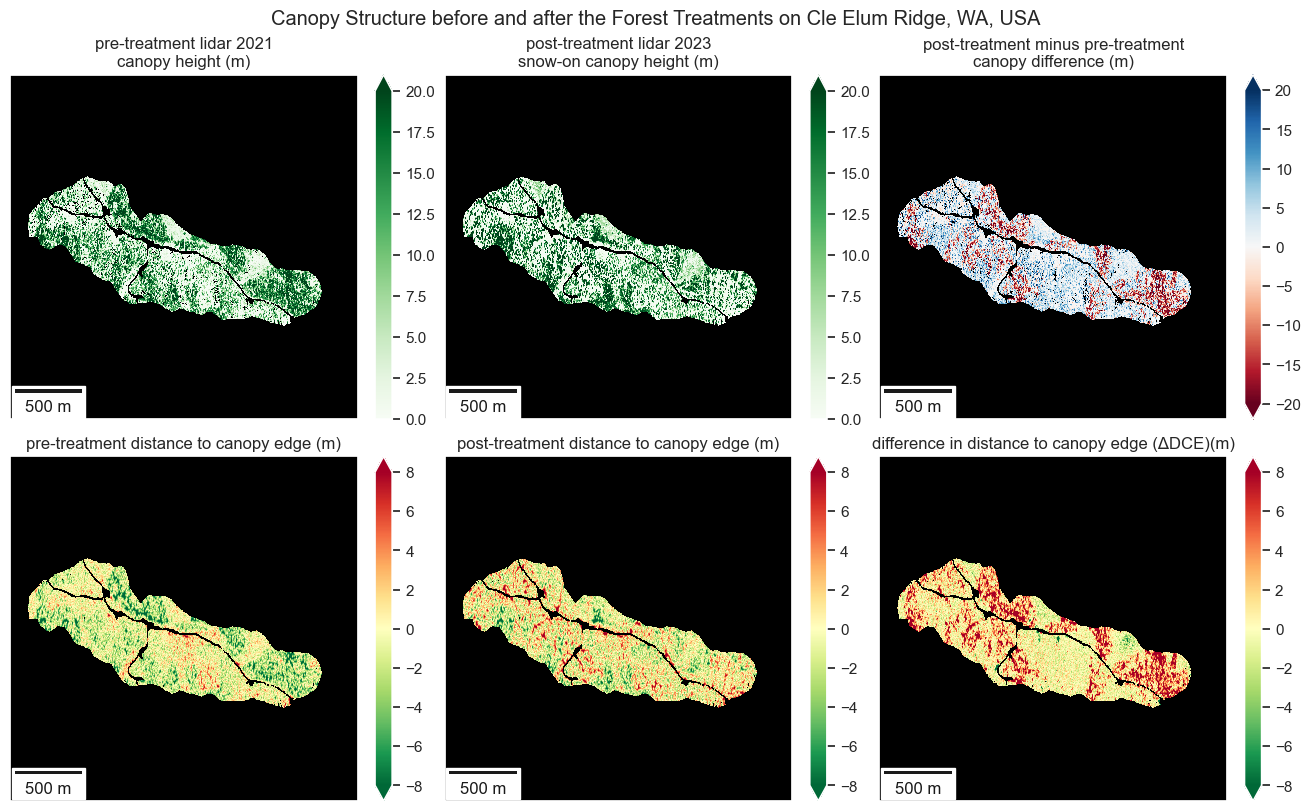

In [19]:
fig, axes = plt.subplots(2, 3, sharex=True, sharey=True, figsize=(13,8), constrained_layout = True)

# fig.suptitle('Cle Elum Ridge, WA, USA\n canopy structure before and after forest treatments')
fig.suptitle('Canopy Structure before and after the Forest Treatments on Cle Elum Ridge, WA, USA')


# row 1
# ds.chm_snowoff.plot(ax=axes[0,0], cmap='Greens', vmin=0, vmax=40, cbar_kwargs={'label':''}) 
ds.chmws_ncalm.plot(ax=axes[0,0], cmap='Greens', vmin=0, vmax=20, cbar_kwargs={'label':''}) 
ds.chmws_rapid.plot(ax=axes[0,1], cmap='Greens', vmin=0, vmax=20, cbar_kwargs={'label':''}) 
# ds.diff_chm_rapid_snowoff.plot(ax=axes[0,2], cmap='RdBu', vmin=-20, vmax=20, cbar_kwargs={'label':''}) 
ds.diff_chm_rapid_ncalm.plot(ax=axes[0,2], cmap='RdBu', vmin=-20, vmax=20, cbar_kwargs={'label':''}) 

# axes[0,0].set_title('$\\bf{pre-treatment  lidar  2021}$\ncanopy height (m)')
axes[0,0].set_title('pre-treatment lidar 2021\ncanopy height (m)')
axes[0,1].set_title('post-treatment lidar 2023\nsnow-on canopy height (m)')
axes[0,2].set_title('post-treatment minus pre-treatment\ncanopy difference (m)')

# row 2
ds['dce_ncalm'].plot(ax=axes[1,0], cmap='RdYlGn_r', vmin=-8, vmax=8, cbar_kwargs={'label':''})
# ds.dce_snowoff.plot(ax=axes[1,0], cmap='RdYlGn_r', vmin=-10, vmax=10, cbar_kwargs={'label':''})
ds.dce_rapid.plot(ax=axes[1,1], cmap='RdYlGn_r', vmin=-8, vmax=8, cbar_kwargs={'label':''})
ds.diff_dce_rapid_ncalm.plot(ax=axes[1,2], cmap='RdYlGn_r', vmin=-8, vmax=8, cbar_kwargs={'label':''})

axes[1,0].set_title('pre-treatment distance to canopy edge (m)')
axes[1,1].set_title('post-treatment distance to canopy edge (m)')
axes[1,2].set_title('difference in distance to canopy edge (ΔDCE)(m)')

# set the axis names
[ax1, ax2, ax3, ax4, ax5, ax6] = axes.ravel()

# create scale bars
for this_ax in [ax1, ax2, ax3, ax4, ax5, ax6]:
    this_ax.set_facecolor("black")
    scalebar = ScaleBar(1, "m", length_fraction=0.25, location='lower left')
    this_ax.add_artist(scalebar)
    this_ax.set_xlabel('')
    this_ax.set_ylabel('') 
    this_ax.set_xticks([])
    this_ax.set_yticks([])

# export the figure with high resolution
figure_name = 'figure2_ch_dce_top.png'
plt.savefig(figure_path + figure_name, dpi=500)

plt.show()